In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import tqdm.notebook as tqdm
import torch

In [3]:
!ls ../Holter_ECG/

index.html  P0044.hea  P0088.hea  P0135.hea  P0181.hea	P0226.hea  P0274.hea
P0001.dat   P0045.dat  P0089.dat  P0136.dat  P0182.dat	P0227.dat  P0275.dat
P0001.hea   P0045.hea  P0089.hea  P0136.hea  P0182.hea	P0227.hea  P0275.hea
P0002.dat   P0046.dat  P0090.dat  P0137.dat  P0183.dat	P0228.dat  P0276.dat
P0002.hea   P0046.hea  P0090.hea  P0137.hea  P0183.hea	P0228.hea  P0276.hea
P0003.dat   P0047.dat  P0091.dat  P0138.dat  P0184.dat	P0229.dat  P0277.dat
P0003.hea   P0047.hea  P0091.hea  P0138.hea  P0184.hea	P0229.hea  P0277.hea
P0004.dat   P0048.dat  P0092.dat  P0139.dat  P0186.dat	P0230.dat  P0278.dat
P0004.hea   P0048.hea  P0092.hea  P0139.hea  P0186.hea	P0230.hea  P0278.hea
P0005.dat   P0049.dat  P0093.dat  P0140.dat  P0187.dat	P0231.dat  P0279.dat
P0005.hea   P0049.hea  P0093.hea  P0140.hea  P0187.hea	P0231.hea  P0279.hea
P0006.dat   P0050.dat  P0094.dat  P0141.dat  P0188.dat	P0232.dat  P0280.dat
P0006.hea   P0050.hea  P0094.hea  P0141.hea  P0188.hea	P0232.hea  P0280.hea
P0007.dat   

In [5]:
#load ecg data
import wfdb

# Specify the file path without the extension (it will look for .dat and .hea automatically)
record_name = "../Holter_ECG/P0001"

# Load the signal and header info
record = wfdb.rdrecord(record_name)  # Loads both .dat and .hea files
signal = record.p_signal  # Get the ECG signal (numpy array)
fields = record.__dict__  # Access additional metadata (like sampling frequency)

# Display basic info
print("Signal Shape:", signal.shape)
print("Sampling Frequency:", record.fs)
print("Channel Names:", record.sig_name)


Signal Shape: (16460600, 3)
Sampling Frequency: 200
Channel Names: ['X', 'Y', 'Z']


In [6]:
# Get channel names
channel_names = record.sig_name
print("Loaded Channels:", channel_names)  # Verify which leads are loaded

Loaded Channels: ['X', 'Y', 'Z']


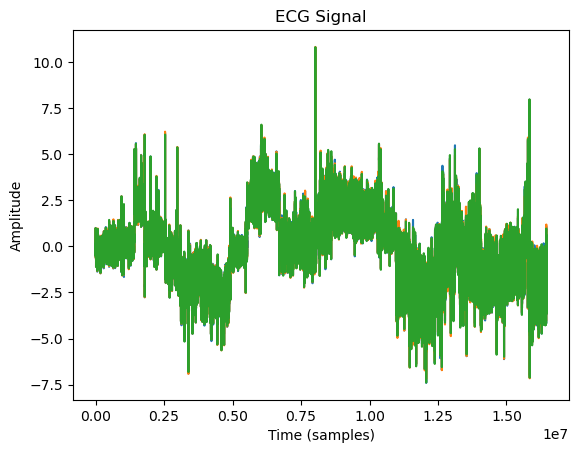

In [7]:
plt.plot(signal)
plt.title("ECG Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

/tmp/ipykernel_1249495/3733877381.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


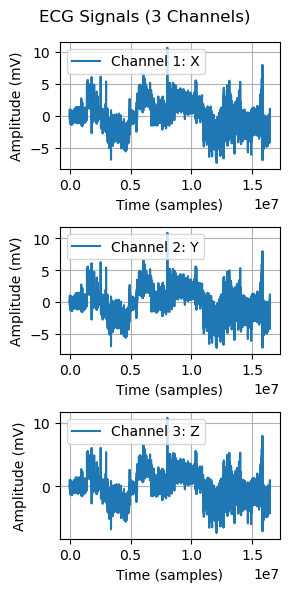

In [9]:
# Plot all channels
plt.figure(figsize=(3, 6))
for i in range(signal.shape[1]):  # Iterate through each channel
    plt.subplot(signal.shape[1], 1, i + 1)  # Create a subplot for each lead
    plt.plot(signal[:, i], label=f"Channel {i+1}: {channel_names[i]}")
    plt.legend()
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude (mV)")
    plt.grid()

plt.suptitle("ECG Signals (3 Channels)")
plt.tight_layout()
plt.show()
